In [278]:
import pandas as pd
import numpy as np
import plotly.express as px
# Veri setinizi yükleyin
data = pd.read_csv("C:/Users/Lenovo/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda (anaconda3)/deliverytime.csv")
data.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0                    75.912471        Snack      motorcycle                24  
1                    77.813237        Snack         scooter                33  
2                    77.688400       Drinks      motorcycle                26  
3                    77.026494       Buffet      motorcycle                21  
4                    80.289982        Snack         scooter                30

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [282]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [284]:
data.drop(columns=['ID','Delivery_person_ID'], inplace=True)

In [286]:
data.head()

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0                   37                      4.9            22.745049   
1                   34                      4.5            12.913041   
2                   23                      4.4            12.914264   
3                   38                      4.7            11.003669   
4                   32                      4.6            12.972793   

   Restaurant_longitude  Delivery_location_latitude  \
0             75.892471                   22.765049   
1             77.683237                   13.043041   
2             77.678400                   12.924264   
3             76.976494                   11.053669   
4             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0                    75.912471        Snack      motorcycle                24  
1                    77.813237        Snack         scooter                33  
2                    77.688400       Drinks      motorcycle                26  
3                    77.026494       Buffet      motorcycle                21  
4                    80.289982        Snack         scooter                30

In [288]:
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
  
# Calculate the distance between each pair of points
data['distance'] = np.nan

for i in range(len(data)):
    data.loc[i, 'distance'] = distcalculate(data.loc[i, 'Restaurant_latitude'], 
                                        data.loc[i, 'Restaurant_longitude'], 
                                        data.loc[i, 'Delivery_location_latitude'], 
                                        data.loc[i, 'Delivery_location_longitude'])
print(data.head())

   Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0                   37                      4.9            22.745049   
1                   34                      4.5            12.913041   
2                   23                      4.4            12.914264   
3                   38                      4.7            11.003669   
4                   32                      4.6            12.972793   

   Restaurant_longitude  Delivery_location_latitude  \
0             75.892471                   22.765049   
1             77.683237                   13.043041   
2             77.678400                   12.924264   
3             76.976494                   11.053669   
4             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  \
0                    75.912471        Snack      motorcycle                24   
1                    77.813237        Snack         scooter               

In [289]:
data = data.drop(columns=['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'])

In [290]:
data.head()

Delivery_person_Age  Delivery_person_Ratings Type_of_order Type_of_vehicle  \
0                   37                      4.9        Snack      motorcycle    
1                   34                      4.5        Snack         scooter    
2                   23                      4.4       Drinks      motorcycle    
3                   38                      4.7       Buffet      motorcycle    
4                   32                      4.6        Snack         scooter    

   Time_taken(min)   distance  
0               24   3.025149  
1               33  20.183530  
2               26   1.552758  
3               21   7.790401  
4               30   6.210138

In [298]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Sayısal sütunlar üzerinde aykırı değer analizi
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri çıkarma
data = data[~((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Aykırı değerlerden temizlenmiş veri seti
print(data.shape)


(38669, 6)


In [300]:
data = data.drop_duplicates()

print(data.shape)

(38643, 6)


In [302]:
print(data['Time_taken(min)'].value_counts())

Time_taken(min)
26    2043
25    1960
27    1914
28    1891
29    1878
19    1774
15    1755
18    1716
17    1655
16    1654
24    1614
20    1560
23    1557
22    1557
21    1522
30    1173
33     773
11     751
10     742
31     740
12     739
14     728
13     713
34     687
32     667
36     586
38     585
37     544
35     530
39     528
44     388
43     385
42     382
41     382
40     381
45     189
Name: count, dtype: int64


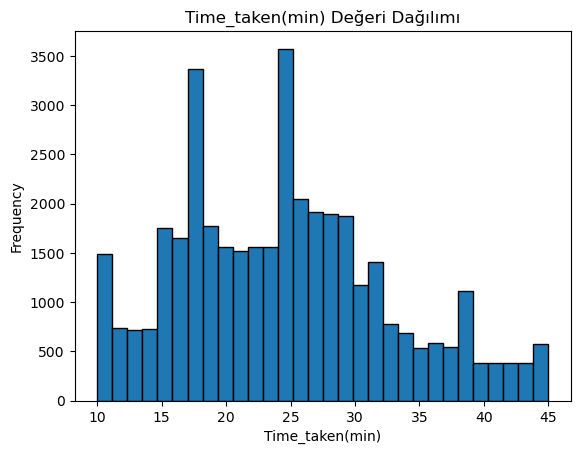

In [304]:
import matplotlib.pyplot as plt

# 'Time_taken(min)' dağılımını görselleştirme
plt.hist(data['Time_taken(min)'], bins=30, edgecolor='black')
plt.xlabel('Time_taken(min)')
plt.ylabel('Frequency')
plt.title('Time_taken(min) Değeri Dağılımı')
plt.show()

In [306]:
# Veri setinden özellikler ve hedef değişkeni seçme
X = data[['Delivery_person_Age', 'distance', 'Delivery_person_Ratings']]
y = data['Time_taken(min)']

# Eğitim ve test setine ayırma
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim verisi boyutu: {X_train.shape}")
print(f"Test verisi boyutu: {X_test.shape}")


Eğitim verisi boyutu: (30914, 3)
Test verisi boyutu: (7729, 3)


In [308]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

X = data.drop(columns=['Delivery_person_Age','Delivery_person_Ratings','distance'])  # Özellikler
y = data['Time_taken(min)']  # Hedef değişken

rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_test_resampled, y_test_resampled = rus.fit_resample(X, y)

# Undersampled veriyi birleştirerek DataFrame oluşturma
resampled_data = pd.DataFrame(X_test_resampled, columns=['Delivery_person_Age', 'distance', 'Delivery_person_Ratings'])
resampled_data['Time_taken(min)'] = y_test_resampled

# Yeni veriyi kontrol edin
print(f'Yeni X verisi boyutu: {X_test_resampled.shape}')
print(f'Yeni y verisi boyutu: {y_test_resampled.shape}')
print(f'Yeni hedef değişken dağılımı:\n{y_test_resampled.value_counts()}')

Yeni X verisi boyutu: (6804, 3)
Yeni y verisi boyutu: (6804,)
Yeni hedef değişken dağılımı:
Time_taken(min)
10    189
11    189
30    189
31    189
32    189
33    189
34    189
35    189
36    189
37    189
38    189
39    189
40    189
41    189
42    189
43    189
44    189
29    189
28    189
27    189
18    189
12    189
13    189
14    189
15    189
16    189
17    189
19    189
26    189
20    189
21    189
22    189
23    189
24    189
25    189
45    189
Name: count, dtype: int64


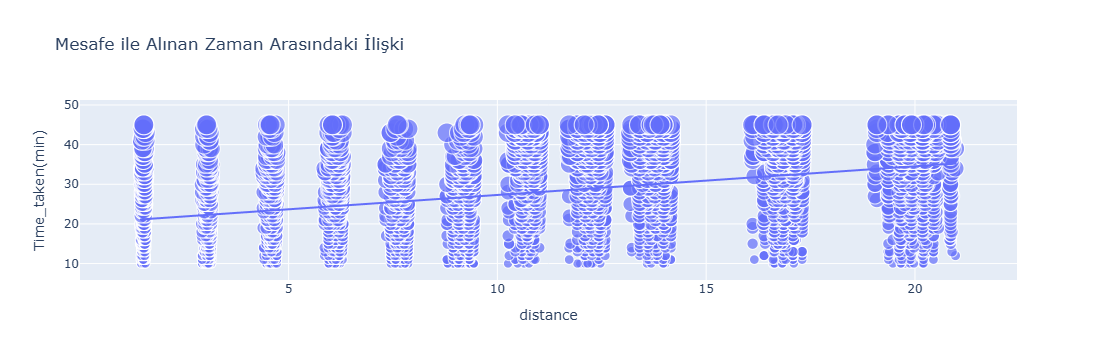

In [312]:
figure = px.scatter(
    data_frame=resampled_data, 
    x="distance", 
    y="Time_taken(min)", 
    size="Time_taken(min)", 
      # Opsiyonel: Hedef değişkene göre renklendirme
    trendline="ols", 
    title="Mesafe ile Alınan Zaman Arasındaki İlişki"
)
figure.show()


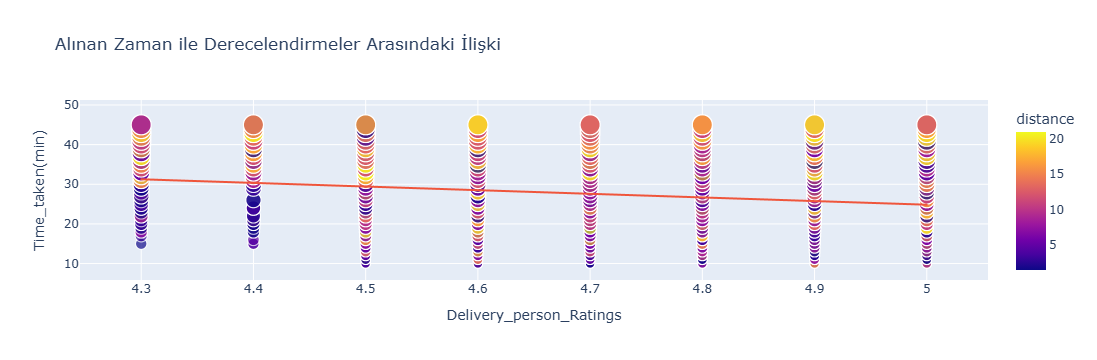

In [316]:
figure = px.scatter(data_frame = resampled_data, 
                    x="Delivery_person_Ratings",
                    y="Time_taken(min)", 
                    size="Time_taken(min)", 
                    color = "distance",
                    trendline="ols", 
                    title = "Alınan Zaman ile Derecelendirmeler Arasındaki İlişki")
figure.show()

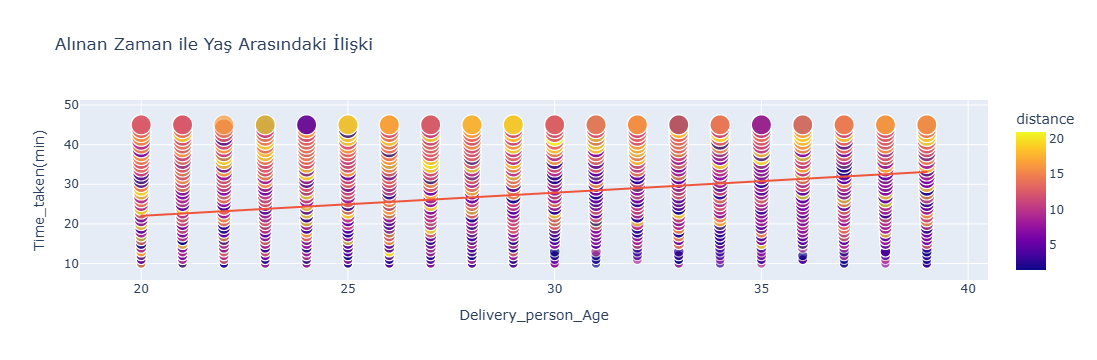

In [318]:
figure = px.scatter(data_frame = resampled_data, 
                    x="Delivery_person_Age",
                    y="Time_taken(min)", 
                    size="Time_taken(min)", 
                    color = "distance",
                    trendline="ols", 
                    title = "Alınan Zaman ile Yaş Arasındaki İlişki")
figure.show()

In [330]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Fonksiyonu tanımlama
def train_model(resampled_data):
    model = RandomForestRegressor(
        n_estimators=100,  # Daha fazla ağaç
        max_depth=10,       # Derinliği sınırlama
        min_samples_split=5,
        random_state=42
    )

    # Modeli eğitme
    model.fit(X_train,y_train)

    # Test seti üzerinde tahmin yapma
    predictions = model.predict(X_test)

    # Hata hesaplama
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Model, tahminler ve metrikleri döndürme
    return model, predictions, mae, r2

# Fonksiyonu çağırma
model, predictions, mae, r2 = train_model(data)

# Sonuçları yazdırma
print(f"\nModel Mean Absolute Error: {mae:.2f} dakika")
print(f"R-kare: {r2}")


Model Mean Absolute Error: 4.95 dakika
R-kare: 0.659088764794034


In [ ]:
def predict_delivery_time():
    print("\nYemek Sipariş Süresi Tahminleme")
    Delivery_person_Age = int(input("Kuryenin yaşını giriniz: "))
    Delivery_person_Ratings = float(input("Kuryenin puanını giriniz: "))
    distance = float(input("Toplam mesafe (km) giriniz: "))
    
    # Kullanıcı girdilerini Pandas DataFrame'e dönüştürme
    features = pd.DataFrame(
        [[Delivery_person_Age, distance, Delivery_person_Ratings ]],
        columns=['Delivery_person_Age', 'distance', 'Delivery_person_Ratings']
    )
    
    # Tahmin yapma
    predicted_time = model.predict(features)
    
    # Tahmin sonucunu yazdırma
    print(f"Tahminlenen süre = {predicted_time[0]:.2f}")

# Kullanıcıdan veri al ve tahmin yap
predict_delivery_time()